IMPORTING LIBRARIES, PACKAGES, AND SETTING OPTIONS FOR ANALYSIS AND VISUALIZATIONS

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline

READING IN DATA 

In [5]:
student_performance = pd.read_csv(r"C:\Users\Jason\OneDrive\Students_Performance_knn.csv")

LOOKING INTO THE DATA AND DATA CLEANING

###### VIEWING THE FIRST 3 ROWS OF DATA

In [6]:
student_performance.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


###### VIEWING THE LAST 3 ROWS OF DATA

In [7]:
student_performance.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


###### CHECKING THE NUMBER OF NULL VALUES IN DATASET

In [8]:
student_performance.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          25
test preparation course         0
math score                      0
reading score                   0
writing score                   0
dtype: int64

###### CHECKING THE UNIQUE VALUES IN THE COLUMN WITH NULLS

In [14]:
student_performance.lunch.unique()

array(['standard', 'free/reduced', nan], dtype=object)

###### TAKING A LOOK AT ALL THE ROWS WITH NAN IN THE LUNCH COLUMN

In [10]:
student_performance[student_performance.lunch.isnull()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
6,female,group B,some college,NaN,completed,88,95,92
41,female,group C,associate's degree,NaN,none,58,73,68
53,male,group D,high school,NaN,none,88,78,75
70,female,group D,some college,NaN,completed,58,63,73
95,male,group C,associate's degree,NaN,completed,78,81,82
115,male,group C,high school,NaN,none,84,77,74
144,male,group D,some college,NaN,none,88,73,78
173,female,group C,associate's degree,NaN,none,63,67,70
188,male,group B,some high school,NaN,none,48,52,45
209,female,group B,some college,NaN,none,58,61,66


###### FILLING ALL THE NAN VALUES AND VERIFYING THE CHANGE

In [27]:
student_performance.fillna("home", inplace=True)
student_performance.lunch.unique()

array(['standard', 'free/reduced', 'home'], dtype=object)

###### TAKING A LOOK AT THE STATISTICAL AND CATEGORICAL DATA

In [28]:
student_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
student_performance.describe(include="object")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,3,2
top,female,group C,some college,standard,none
freq,518,319,226,631,642


In [32]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


DATA ANALYSIS / VISUALIZATIONS

###### NUMBER OF FEMALE STUDENTS VS MALE STUDENTS

In [83]:
student_performance.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

Percentage of Female students vs Male students


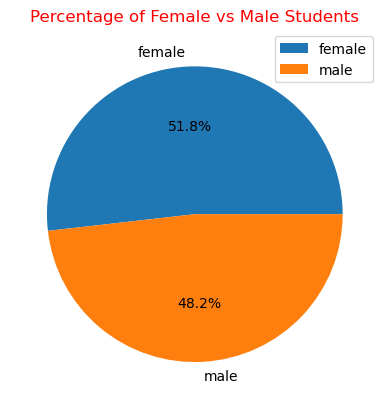

In [144]:
student_performance.gender.value_counts().plot(kind="pie", x=student_performance["gender"] == "female", y=student_performance["gender"] == "male", autopct="%1.1f%%"), plt.title("Percentage of Female vs Male Students", color="red"), plt.legend(), plt.ylabel("")
print(f"Percentage of Female students vs Male students")

###### NUMBER OF TOTAL STUDENTS BY RACE/ETHNICITY

In [88]:
student_performance["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Percentage of Number of total Students by Race/Ethnicity


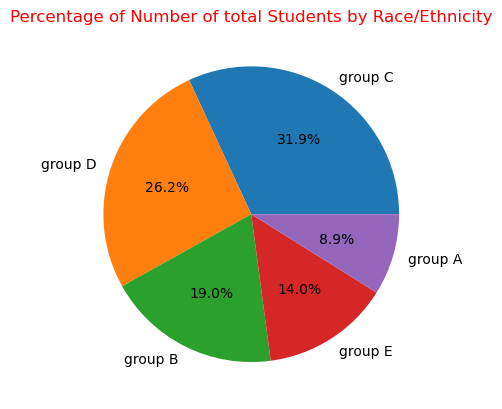

In [142]:
student_performance["race/ethnicity"].value_counts().plot(kind="pie", y="Name", x="race/ethnicity", autopct="%1.1f%%"), plt.title("Percentage of Number of total Students by Race/Ethnicity", color="red"), plt.ylabel("")
print(f"Percentage of Number of total Students by Race/Ethnicity")

###### NUMBER OF FEMALE STUDENTS VS MALE STUDENTS BY RACE/ETHNICITY

In [104]:
student_performance.groupby("gender")["race/ethnicity"].value_counts()

gender  race/ethnicity
female  group C           180
        group D           129
        group B           104
        group E            69
        group A            36
male    group C           139
        group D           133
        group B            86
        group E            71
        group A            53
Name: race/ethnicity, dtype: int64

Number of Female students vs Male students by Race/Ethnicity


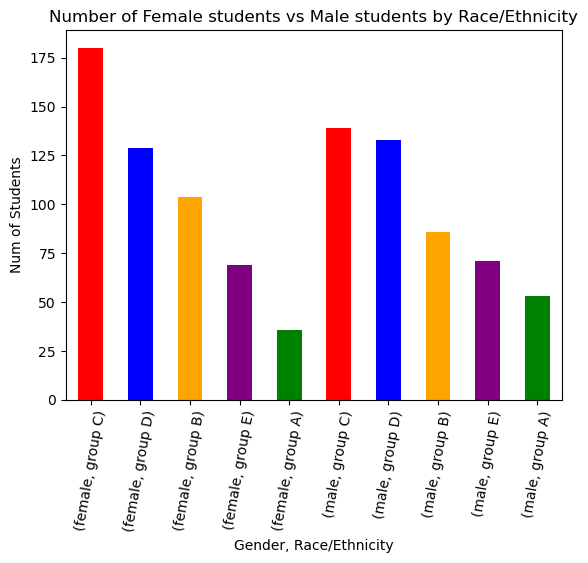

In [129]:
c = ["red", "blue", "orange", "purple", "green"]
student_performance.groupby("gender")["race/ethnicity"].value_counts().plot(kind="bar", color= c, rot=80), plt.title("Number of Female students vs Male students by Race/Ethnicity"), plt.ylabel("Num of Students"), plt.xlabel("Gender, Race/Ethnicity")
print("Number of Female students vs Male students by Race/Ethnicity")


###### COUNT OF PARENTS EDUCATIONAL LEVEL FOR ALL STUDENTS

In [100]:
student_performance["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Percentage of Parents Educational Level for all Students


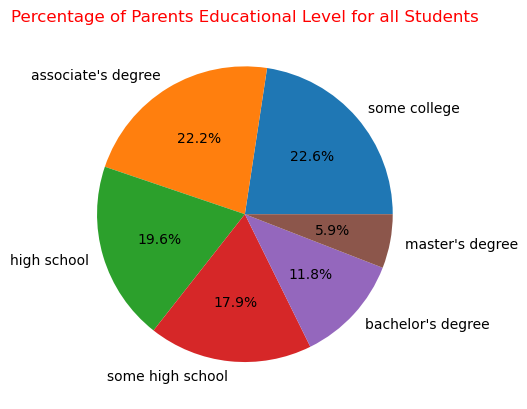

In [141]:
student_performance["parental level of education"].value_counts().plot(kind="pie", x="Name", y="parental level of education", autopct="%1.1f%%"), plt.title("Percentage of Parents Educational Level for all Students", color="red"), plt.ylabel("")
print("Percentage of Parents Educational Level for all Students")

###### COUNT OF PARENTS EDUCATIONAL LEVEL BY GENDER

In [103]:
student_performance.groupby("gender")["parental level of education"].value_counts()

gender  parental level of education
female  some college                   118
        associate's degree             116
        high school                     94
        some high school                91
        bachelor's degree               63
        master's degree                 36
male    some college                   108
        associate's degree             106
        high school                    102
        some high school                88
        bachelor's degree               55
        master's degree                 23
Name: parental level of education, dtype: int64

Female Parents Education Level vs Males Parents Education Level


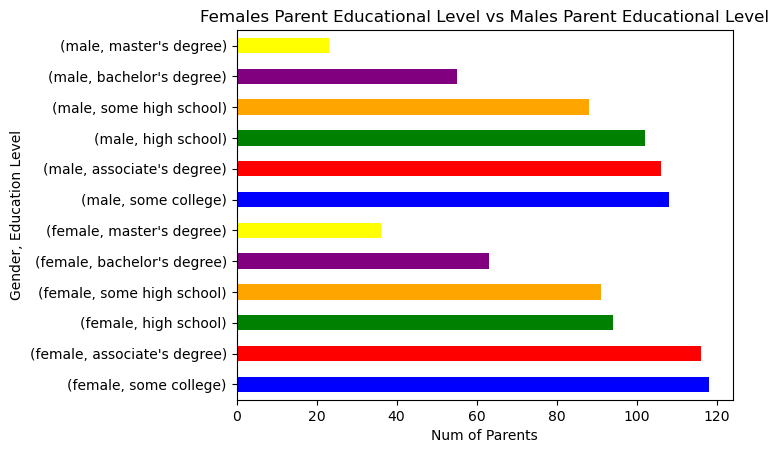

In [134]:
c = ["blue", "red", "green", "orange", "purple", "yellow"]
student_performance.groupby("gender")["parental level of education"].value_counts().plot(kind="barh", color= c), plt.title("Females Parent Educational Level vs Males Parent Educational Level"), plt.ylabel("Gender, Education Level"), plt.xlabel("Num of Parents")
print("Female Parents Education Level vs Males Parents Education Level")

###### NUMBER OF TOTAL STUDENTS BY LUNCH TYPE

In [135]:
student_performance.lunch.value_counts()

standard        631
free/reduced    344
home             25
Name: lunch, dtype: int64

Percentage of Students by Lunch Type


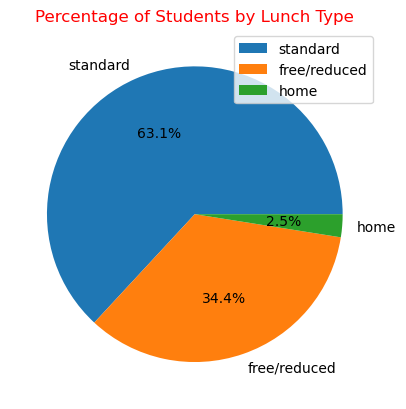

In [195]:
student_performance.lunch.value_counts().plot(kind="pie", x="Name", y="lunch", autopct="%1.1f%%"), plt.title("Percentage of Students by Lunch Type", color="red"), plt.ylabel(""), plt.legend()
print("Percentage of Students by Lunch Type")

###### STUDENTS LUNCH TYPE COUNT BY GENDER

In [145]:
student_performance.groupby("gender")["lunch"].value_counts()

gender  lunch       
female  standard        323
        free/reduced    184
        home             11
male    standard        308
        free/reduced    160
        home             14
Name: lunch, dtype: int64

Lunch Type by Gender


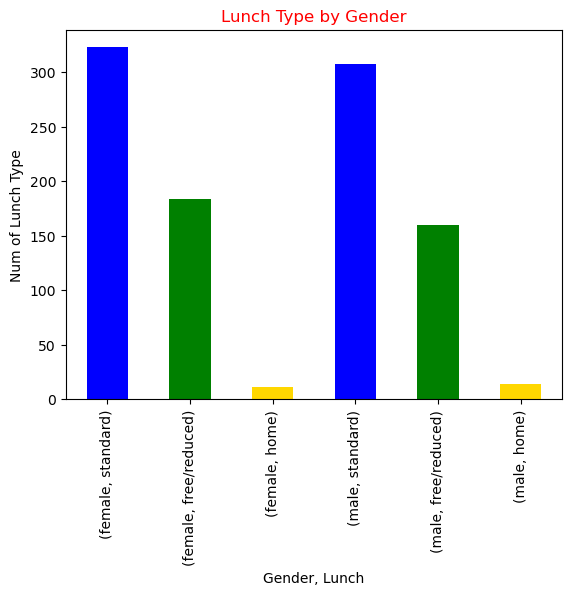

In [196]:
c = ["blue", "green", "gold"]
student_performance.groupby("gender")["lunch"].value_counts().plot(kind="bar", x="Name", y="lunch", color= c), plt.title("Lunch Type by Gender", color="red"), plt.ylabel("Num of Lunch Type"), plt.xlabel("Gender, Lunch")
print("Lunch Type by Gender")

###### COUNT OF STUDENTS BY TEST PREPARATION

In [162]:
student_performance["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Percentage of Students by Test Preparation


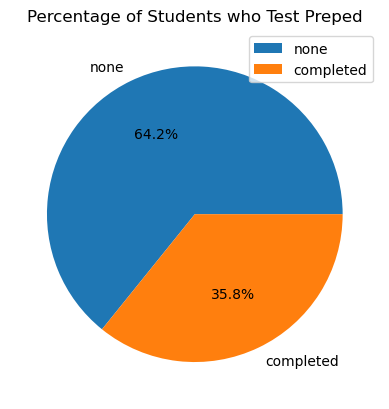

In [194]:
student_performance["test preparation course"].value_counts().plot(kind="pie", x="Name", y="test preparation course", autopct="%1.1f%%",), plt.title("Percentage of Students who Test Preped"), plt.legend(), plt.ylabel("")
print("Percentage of Students by Test Preparation")

###### COUNT OF STUDENTS WHO TEST PREPED BY GENDER

In [163]:
student_performance.groupby("gender")["test preparation course"].value_counts()

gender  test preparation course
female  none                       334
        completed                  184
male    none                       308
        completed                  174
Name: test preparation course, dtype: int64

Test Preparation by Gender


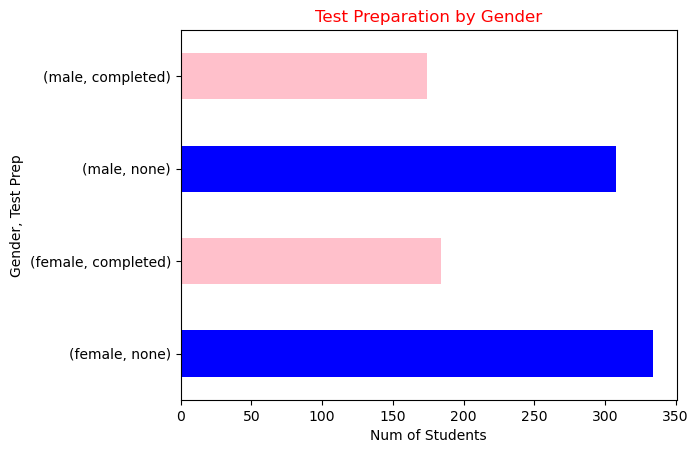

In [203]:
c = ["blue", "pink"]
student_performance.groupby("gender")["test preparation course"].value_counts().plot(kind="barh", color = c), plt.title("Test Preparation by Gender", color="red"), plt.ylabel("Gender, Test Prep"), plt.xlabel("Num of Students")
print("Test Preparation by Gender")

###### AVG/MAX/MIN MATH SCORES BY GENDER AND TEST PREPARATION

In [219]:
student_performance.groupby(["gender", "test preparation course"])["math score"].agg(["mean", "max", "min"])
def color_red(val):
    color = "red" if val < 70 else "green" 
    return "color: %s" % color
s = student_performance.groupby(["gender", "test preparation course"])["math score"].agg(["mean", "max", "min"]).style.applymap(color_red)
s


###### AVG/MAX/MIN READING SCORES BY GENDER AND TEST PREPARATION

In [215]:
student_performance.groupby(["gender", "test preparation course"])["reading score"].agg(["mean", "max", "min"])
def color_code(val):
    color = "red" if val < 70 else "green"
    return "color: %s" % color
s = student_performance.groupby(["gender", "test preparation course"])["reading score"].agg(["mean", "max", "min"]).style.applymap(color_code)
s

###### AVG/MAX/MIN WRITING SCORES BY GENDER AND TEST PREPARATION 

In [216]:
student_performance.groupby(["gender", "test preparation course"])["writing score"].agg(["mean", "max", "min"])
def color_code(val):
    color = "red" if val < 70 else "green" 
    return "color: %s" % color
s = student_performance.groupby(["gender", "test preparation course"])["writing score"].agg(["mean", "max", "min"]).style.applymap(color_code)
s

###### AVG/MAX/MIN TEST SCORES BY GENDER AND RACE/ETHNICITY

In [217]:
student_performance.groupby(["gender", "race/ethnicity"])[["math score", "reading score", "writing score"]].agg(["mean", "max", "min"])
def color_code(val):
    color = "red" if val < 70 else "green" 
    return "color: %s" % color
s = student_performance.groupby(["gender", "race/ethnicity"])[["math score", "reading score", "writing score"]].agg(["mean", "max", "min"]).style.applymap(color_code)
s
